In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
from google.colab import files
files.upload()

Saving titanic_dataset.csv to titanic_dataset (1).csv


{'titanic_dataset.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55

In [42]:
data= pd.read_csv('titanic_dataset.csv')

In [43]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
data= pd.read_csv('titanic_dataset.csv', index_col='PassengerId')

In [152]:
## Dataset loaded with PassengerId as index column

In [45]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
data.shape

(891, 11)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [48]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [49]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [50]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [51]:
data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

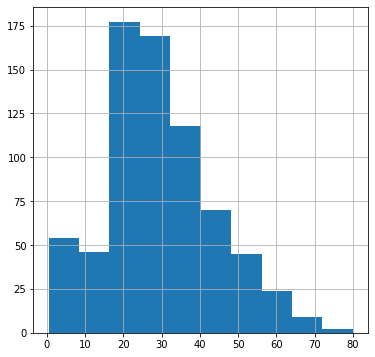

In [52]:
data['Age'].hist(figsize=(6,6))
plt.show()

In [153]:
## The distribution of 'Age' is Left-Skewed
## So using median to fill missing values

In [53]:
data['Age']= data['Age'].fillna(data['Age'].median())

In [154]:
## Using mode to fill missing values in "Embarked"

In [54]:
data['Embarked']= data['Embarked'].fillna(data['Embarked'].mode()[0])

In [55]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [155]:
## "Cabin" has a lot of missing values. So will be eventually dropped.

**HANDLING OUTLIERS**

In [156]:
## Using IQR Method

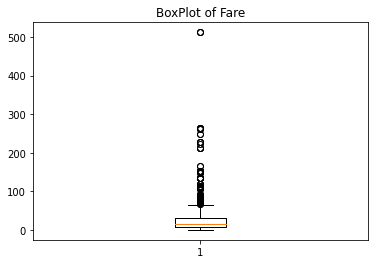

In [56]:
plt.boxplot(data['Fare'])
plt.title('BoxPlot of Fare')
plt.show()

In [57]:
Fare_Q1=np.percentile(data['Fare'], 25, interpolation='midpoint')
Fare_Q2=np.percentile(data['Fare'], 50, interpolation='midpoint')
Fare_Q3=np.percentile(data['Fare'], 75, interpolation='midpoint')

In [58]:
Fare_Q1, Fare_Q2, Fare_Q3

(7.9104, 14.4542, 31.0)

In [59]:
Fare_IQR= Fare_Q3-Fare_Q1

In [60]:
Fare_IQR

23.0896

In [61]:
Fare_low_lim = Fare_Q1-1.5*Fare_IQR
Fare_up_lim = Fare_Q3+1.5*Fare_IQR

In [62]:
Fare_low_lim, Fare_up_lim

(-26.724, 65.6344)

In [63]:
outlier1= []
for x in data['Fare']:
  if((x>Fare_up_lim) or (x<Fare_low_lim)):
    outlier1.append(x)

In [64]:
outlier1

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [65]:
Fare_ind = data['Fare']>Fare_up_lim

In [66]:
data.loc[Fare_ind].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [77]:
data1=data

In [78]:
data1= data1.drop(data1.loc[Fare_ind].index)

In [158]:
## Dropping the Outliers in "Fare"

In [79]:
data1.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [80]:
data1.tail(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
879,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,349217,7.8958,NaN,S


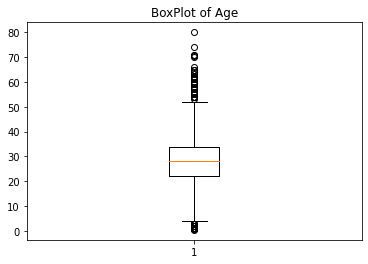

In [81]:
plt.boxplot(data1['Age'])
plt.title('BoxPlot of Age')
plt.show()

In [93]:
Age_Q1=np.percentile(data1['Age'], 25, interpolation='midpoint')
Age_Q2=np.percentile(data1['Age'], 50, interpolation='midpoint')
Age_Q3=np.percentile(data1['Age'], 75, interpolation='midpoint')

In [94]:
Age_Q1, Age_Q2, Age_Q3

(22.0, 28.0, 34.0)

In [95]:
Age_IQR= Age_Q3-Age_Q1

In [96]:
Age_IQR

12.0

In [97]:
Age_low_lim = Age_Q1-1.5*Age_IQR
Age_up_lim = Age_Q3+1.5*Age_IQR

In [98]:
Age_low_lim, Age_up_lim

(4.0, 52.0)

In [99]:
outlier2= []
for x in data1['Age']:
  if((x>Age_up_lim) or (x<Age_low_lim)):
    outlier2.append(x)

In [100]:
outlier2

[54.0,
 2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 3.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 3.0,
 2.0,
 59.0,
 54.0,
 62.0,
 3.0,
 65.0,
 54.0,
 61.0,
 2.0,
 3.0,
 3.0,
 1.0,
 1.0,
 3.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 54.0,
 2.0,
 64.0,
 62.0,
 62.0,
 53.0,
 54.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 70.0,
 60.0,
 60.0,
 0.67,
 57.0,
 54.0,
 1.0,
 0.42,
 2.0,
 1.0,
 0.83,
 74.0]

In [104]:
Age_ind1 = data1['Age']>Age_up_lim 

In [105]:
Age_ind2 = data1['Age']<Age_low_lim

In [107]:
data1.loc[Age_ind1].index

Int64Index([  7,  12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 233, 250,
            253, 281, 318, 327, 457, 468, 484, 488, 493, 494, 514, 546, 556,
            571, 572, 583, 626, 627, 631, 648, 673, 685, 695, 773, 775, 852],
           dtype='int64', name='PassengerId')

In [108]:
data1.loc[Age_ind2].index

Int64Index([  8,  17,  44,  79, 120, 165, 173, 184, 194, 206, 262, 341, 349,
            375, 382, 387, 408, 470, 480, 531, 643, 645, 756, 789, 804, 825,
            828, 832],
           dtype='int64', name='PassengerId')

In [109]:
data1= data1.drop(data1.loc[Age_ind1].index)
data1= data1.drop(data1.loc[Age_ind2].index)

In [159]:
## Dropping the Outliers in 'Age'

In [110]:
data1.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


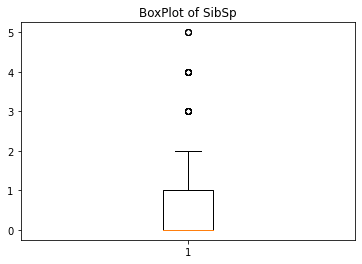

In [111]:
plt.boxplot(data1['SibSp'])
plt.title('BoxPlot of SibSp')
plt.show()

In [112]:
SibSp_Q1=np.percentile(data1['SibSp'], 25, interpolation='midpoint')
SibSp_Q2=np.percentile(data1['SibSp'], 50, interpolation='midpoint')
SibSp_Q3=np.percentile(data1['SibSp'], 75, interpolation='midpoint')

In [113]:
SibSp_Q1, SibSp_Q2, SibSp_Q3

(0.0, 0.0, 1.0)

In [114]:
SibSp_IQR= SibSp_Q3-SibSp_Q1

In [115]:
SibSp_IQR

1.0

In [116]:
SibSp_low_lim = SibSp_Q1-1.5*SibSp_IQR
SibSp_up_lim = SibSp_Q3+1.5*SibSp_IQR

In [117]:
SibSp_low_lim, SibSp_up_lim

(-1.5, 2.5)

In [118]:
outlier3= []
for x in data1['SibSp']:
  if((x>SibSp_up_lim) or (x<SibSp_low_lim)):
    outlier3.append(x)

In [119]:
outlier3

[3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4]

In [120]:
SibSp_ind = data1['SibSp']>SibSp_up_lim 

In [122]:
data1.loc[SibSp_ind].index

Int64Index([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 267,
            279, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788, 814, 820,
            851],
           dtype='int64', name='PassengerId')

In [123]:
data1= data1.drop(data1.loc[SibSp_ind].index)

In [160]:
## Dropping the Outliers in "SibSp"

In [124]:
data1.head(30)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


In [125]:
data1.shape

(681, 11)

In [126]:
data1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       586
Embarked      0
dtype: int64

In [127]:
data1.nunique()

Survived      2
Pclass        3
Name        681
Sex           2
Age          60
SibSp         3
Parch         7
Ticket      593
Fare        191
Cabin        72
Embarked      3
dtype: int64

In [128]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  681 non-null    int64  
 1   Pclass    681 non-null    int64  
 2   Name      681 non-null    object 
 3   Sex       681 non-null    object 
 4   Age       681 non-null    float64
 5   SibSp     681 non-null    int64  
 6   Parch     681 non-null    int64  
 7   Ticket    681 non-null    object 
 8   Fare      681 non-null    float64
 9   Cabin     95 non-null     object 
 10  Embarked  681 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 63.8+ KB


In [129]:
data1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [161]:
## "Name" and "Ticket" do not contibute to target variable "Survived". 
## So are dropped

In [131]:
data2 = data1.drop(['Name', 'Ticket'], axis=1)

In [162]:
## "cabin" has too many missing values 

In [132]:
data2 = data2.drop('Cabin', axis=1)

In [134]:
data2.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
6,0,3,male,28.0,0,0,8.4583,Q
9,1,3,female,27.0,0,2,11.1333,S
10,1,2,female,14.0,1,0,30.0708,C
11,1,3,female,4.0,1,1,16.7000,S
13,0,3,male,20.0,0,0,8.0500,S


In [135]:
data2.shape

(681, 8)

**ONE_HOT ENCODING**

In [136]:
data3 = pd.get_dummies(data2)

In [137]:
data3.shape

(681, 11)

In [140]:
data2.Sex.nunique()

2

In [141]:
data2.Embarked.nunique()

3

In [138]:
data3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1
6,0,3,28.0,0,0,8.4583,0,1,0,1,0


In [163]:
## Dropping "Survived" as it is the target variable from the feature set

In [142]:
X = data2.drop('Survived', axis=1)
y= data2['Survived']

**MIN_MAX SCALING**

In [164]:
## "Sex" and "Embarked" are encoded columns so are dropped from feature set for Scaling/Normalization

In [143]:
X = X.drop(['Sex', 'Embarked'], axis=1)

In [144]:
X.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
6,3,28.0,0,0,8.4583


In [145]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
minmax = MinMaxScaler(feature_range=(0,1))

In [147]:
X1 = minmax.fit_transform(X)

In [148]:
X1

array([[1.        , 0.375     , 0.5       , 0.        , 0.11153846],
       [1.        , 0.45833333, 0.        , 0.        , 0.12192308],
       [0.        , 0.64583333, 0.5       , 0.        , 0.81692308],
       ...,
       [1.        , 0.5       , 0.5       , 0.33333333, 0.36076923],
       [0.        , 0.45833333, 0.        , 0.        , 0.46153846],
       [1.        , 0.58333333, 0.        , 0.        , 0.11923077]])

In [149]:
X1 = pd.DataFrame(X1, columns= ['Pclass',	'Age',	'SibSp',	'Parch',	'Fare'])

In [151]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,681.000000,681.000000,681.000000,681.000000,681.000000
mean,2.500734,28.616740,0.265786,0.268722,16.590772
std,0.721772,9.077604,0.495410,0.753252,13.260513
min,1.000000,4.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,33.000000,0.000000,0.000000,23.250000
max,3.000000,52.000000,2.000000,6.000000,65.000000


In [150]:
X1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,681.000000,681.000000,681.000000,681.000000,681.000000
mean,0.750367,0.512849,0.132893,0.044787,0.255243
std,0.360886,0.189117,0.247705,0.125542,0.204008
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.395833,0.000000,0.000000,0.120834
50%,1.000000,0.500000,0.000000,0.000000,0.161538
75%,1.000000,0.604167,0.000000,0.000000,0.357692
max,1.000000,1.000000,1.000000,1.000000,1.000000
